<h1>Chapter 3 | Case Study B1| <b>Comparing Hotel Prices in Europe: Vienna vs. London</b></h1>
<p>In this notebook, I'll be taking notes of the author's code on the referred case study. The goal is to compare different type of distributions considering the same feature (in this case, hotels from different cities) to visualize such differences. We want to compare the distribution of prices in Vienna to London.</p>
<h2>1. Read the data</h2>

In [1]:
import os
import sys
import warnings
import pandas as pd
import numpy as np
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import norm

warnings.filterwarnings("ignore")


In [2]:
pd.set_option("display.max_rows", 500)

In [3]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

#  Get location folders
data_in = f"{dirname}da_data_repo/hotels-europe/clean/"
data_out = f"{dirname}da_case_studies/ch03-hotels_europe_compare/"
output = f"{dirname}da_case_studies/ch03-hotels_europe_compare/output/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [4]:
from py_helper_functions import *

<h2>2. Load clean and tidy data + create workfile</h2>

In [8]:
hotels_europe_price = pd.read_csv(f"{data_in}hotels-europe_price.csv")
hotels_europe_features = pd.read_csv(f"{data_in}hotels-europe_features.csv")

In [9]:
hotels_europe = pd.merge(hotels_europe_price, hotels_europe_features, how="left", on="hotel_id")
del hotels_europe_price
del hotels_europe_features

<p>Our clean dataset is in a tidy format and has been splitted into two datasets, prices and features, which describe our observations. Let's merge them back with only the cities that we want - Vienna and London. Again, we are focusing on hotels with 3 to 4 stars for a particular date (november/2017 on week days).</p>

In [11]:
hotels_europe_cut = hotels_europe.loc[
    lambda x: (x["year"] == 2017) &
    (x["month"] == 11) &
    (x["weekend"] == 0) &
    (x["city"].isin(["Vienna", "London"])) &
    (x["accommodation_type"] == "Hotel") &
    (x["stars"] >= 3) &
    (x["stars"] <=4) &
    (x["stars"].notna()) &
    (x["city_actual"].isin(["Vienna", "London"])) &
    (x["price"] <= 600)
]

In [13]:
hotels_europe_cut["price"].max()

491

<p>We can see the highest hotel price is 491 for the entire dataset. Let's see the mean and max prices for each City, as well as the size of our sample for each of them.</p>

In [14]:
hotels_europe_cut.groupby("city").agg(
    mean_price=("price", "mean"), max=("price", "max"), n=("price", "size")
)

,mean_price,max,n
city,,,
London,202.356322,491,435
Vienna,109.975845,383,207


<p>We can see the average price for hotels in London is nearly the double of Vienna's. The most expensive hotel in town is also more than 100 euro more expensive, and the N of the city is twice the size of Vienna's. Let's plot the distribution of hotel prices in these two cities and focus on the differences.</p>
<h2>3. Plot the histograms</h2>
<p>To make meaningful comparisons, we can define the same bin size ($20). Let's discuss the results below the histograms.</p>

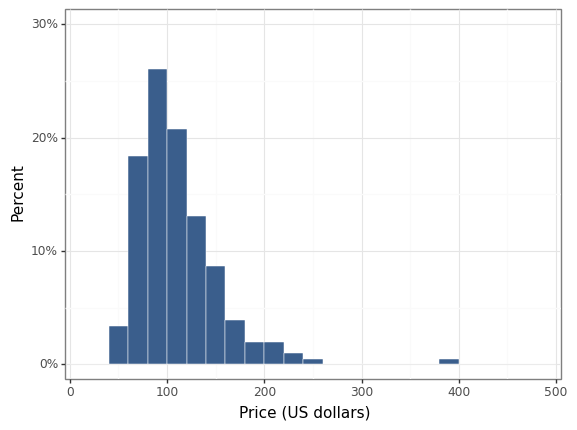

<ggplot: (190013590991)>

In [16]:
# Vienna
ggplot(
    hotels_europe_cut.query("city=='Vienna'"),
    aes(x="price", y="stat(count)/sum(stat(count))"),
) + geom_histogram(
    binwidth=20,
    fill=color[0],
    color="#FFFFFF",
    size=0.2,
    alpha=0.8,
    boundary=0,
    closed="left",
) + labs(x="Price (US dollars)", y="Percent"
) + scale_y_continuous(
    labels=percent_format(), expand=[0.01, 0.01], limits=[0, 0.3]
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 500], breaks=list(range(0, 600, 100))
) + theme_bw()

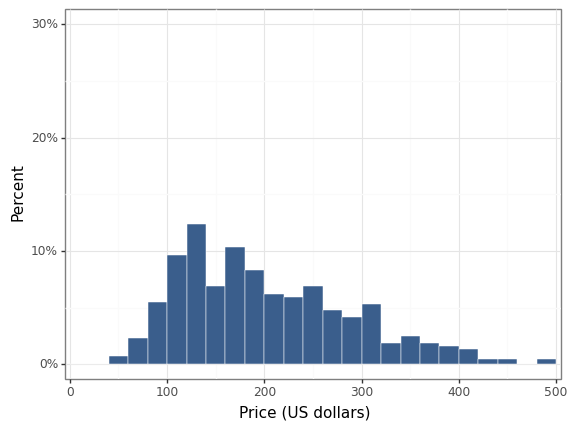

<ggplot: (190013637176)>

In [17]:
# London
ggplot(
    hotels_europe_cut.query("city=='London'"),
    aes(x="price", y="stat(count)/sum(stat(count))"),
) + geom_histogram(
    binwidth=20,
    fill=color[0],
    color="#FFFFFF",
    size=0.2,
    alpha=0.8,
    boundary=0,
    closed="left",
) + labs(x="Price (US dollars)", y="Percent"
) + scale_y_continuous(
    labels=percent_format(), expand=[0.01, 0.01], limits=[0, 0.3]
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 500], breaks=list(range(0, 600, 100))
) + theme_bw()

<hr>
<b>Figure 3.6</b> The distribution of hotel price in Vienna and in London
<p>Observations:</p>
<ul>
<li>The <b>range</b> starts around $50 for both Vienna and London, but it ends <b>below $400</b> in Vienna while going up to <b>$500</b> in London. This confirms the max price value that we had found.</li>
<li>London presents a wider distribution of hotel prices, covering more of the higher prices.</li>
<li>You can expect <b>higher</b> hotel prices in London.</li>
<li>The mode (which is only one) for each city differs. In Vienna, the bin with the highest frequency is the <b>$80-100</b> bin, while in London is the <b>$100-120</b> bin.</li>
</ul>

<h2>3. Density plots of hotel prices</h2>
<p>To visualize the distribution of hotel prices in these two cities in a single chart, we can plot a density plot.</p>

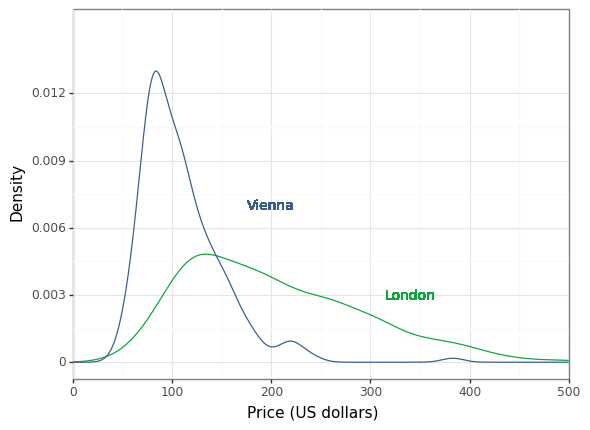

<ggplot: (190013677028)>

In [18]:
ggplot(hotels_europe_cut, aes(x="price", y="stat(density)", color="city")) + geom_line(
    stat="density", show_legend="False"
) + labs(x="Price (US dollars)", y="Density", color="") + scale_color_manual(
    name="", values=[color[1], color[0]], labels=["London", "Vienna"]
) + scale_y_continuous(
    limits=[0, 0.015], breaks=seq(0, 0.015, 0.003)
) + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 500], breaks=seq(0, 501, 100)
) + geom_text(
    aes(x=340, y=0.003, label=["London"]), color=color[1], size=10
) + geom_text(
    aes(x=200, y=0.007, label=["Vienna"]), color=color[0], size=10
) + theme_bw()

<hr>
<b>Figure 3.7</b> Density plots of hotel prices: Vienna and London

<p>Let's move to our final part, that is, getting descriptive summary statistics.</p>
<h2>4. Descriptive statistics for hotel prices<h2>

In [20]:
hotels_europe_cut.groupby("city").agg(
    n=("price", "size"),
    mean=("price", np.mean),
    median=("price", np.median),
    min=("price", np.min),
    max=("price", np.max),
    sd=("price", np.std),
    skew=("price", skew),
)

,n,mean,median,min,max,sd,skew
city,,,,,,,
London,435,202.356322,186.0,49,491,88.128830,0.186
Vienna,207,109.975845,100.0,50,383,42.221381,0.237


<hr>
<p><b>Table 3.6</b> Descriptive statistics for hotel prices in two cities</p>
<p>Let's discuss these statistics for a while. Again, there's a significant difference between the mean prices - $92, or almost 90% more relative to Vienna's average prices. The <b>median</b> is lower than the mean in both cases, which implies a <b>skewed distribution</b> in both cities; in this case, to the right. With the standard deviation, we can calculate how skewed these distrbutions are using the <b>mean-median measure of skewness</b>. The result is that Vienna displays a higher degree of skewness. Moreover, the standard distribution of London is twice as large as Vienna's, which indicates that prices are more dispersed. </p>
<h2>5. Conclusion</h2>
<p>We have successfully analyzed the distribution of hotel prices in London and in Vienna. We can say that minimum prices are somewhat close to each other in these cities, but also that we can expect a higher number of more expensive hotels in London; significantly higher, actually. So, when visiting London, be aware of that and stuff your wallet!</p>
<hr>